In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Order_Details = pd.read_csv(r"C:\Users\vdu80\Downloads\Order_details(masked).csv")


In [2]:

Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

Order_Details['Hour'] = (Order_Details['Time']).dt.hour


In [3]:
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24] 

timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]

In [4]:
tmost = np.column_stack((timemost1,timemost2))

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))


 Hour Of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [5]:
timemost = Order_Details['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
    timemost1.append(i)
    
timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)


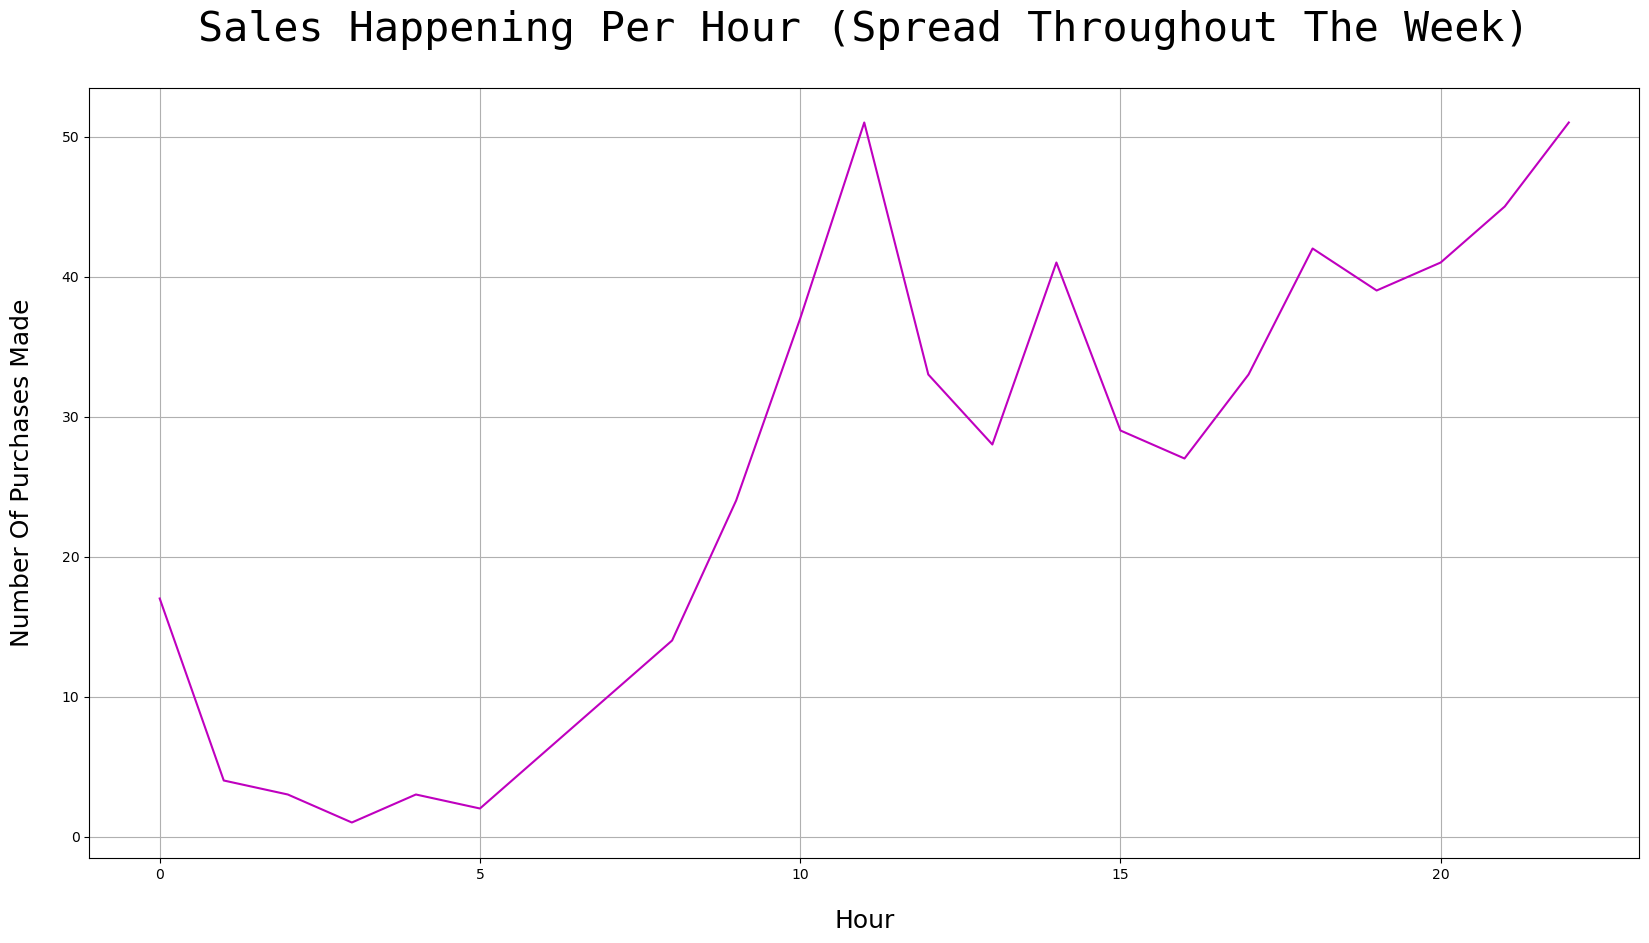

In [6]:
plt.figure(figsize=(20, 10))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()


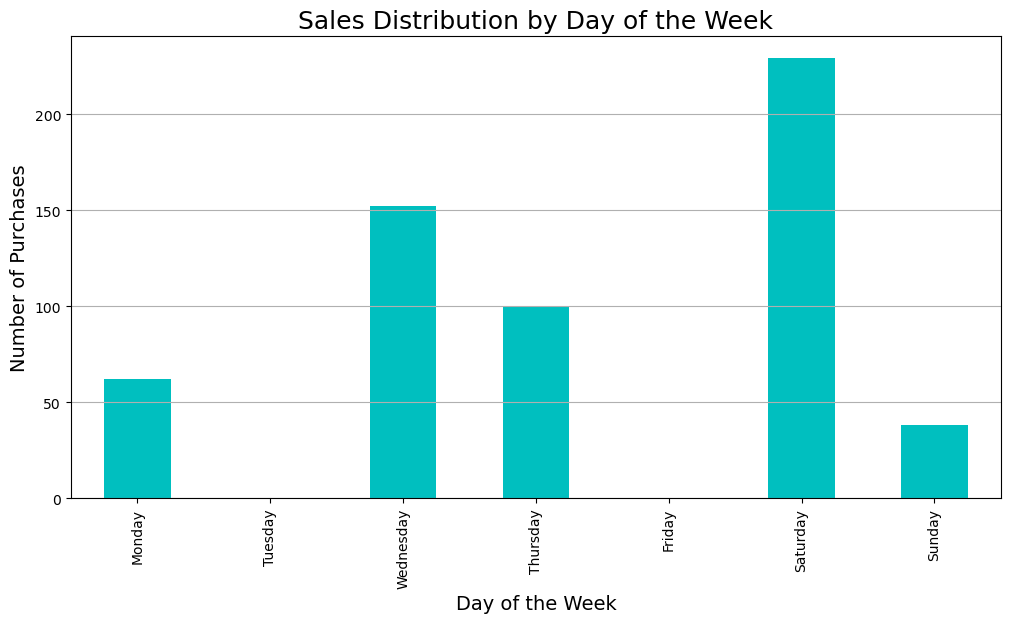

In [7]:
Order_Details['Day'] = Order_Details['Time'].dt.day_name()

daily_sales = Order_Details['Day'].value_counts()

plt.figure(figsize=(12, 6))
daily_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='c')
plt.title('Sales Distribution by Day of the Week', fontsize=18)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.grid(axis='y')
plt.show()


In [8]:
print(Order_Details.columns)


Index(['Name', 'Email', 'Product', 'Transaction Date', 'Time', 'Hour', 'Day'], dtype='object')


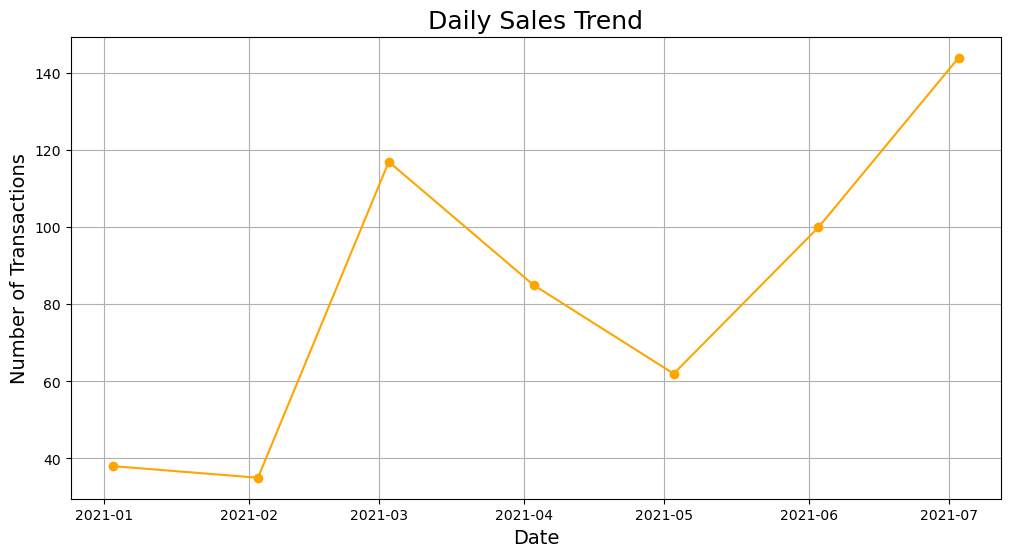

In [9]:
# Aggregate sales by date
daily_trend = Order_Details.groupby(Order_Details['Time'].dt.date).size()

# Plot
plt.figure(figsize=(12, 6))
daily_trend.plot(kind='line', marker='o', color='orange')
plt.title('Daily Sales Trend', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.grid()
plt.show()


In [10]:
missing_data = Order_Details[Order_Details.isnull().any(axis=1)]
print(missing_data)  # Rows with missing values

Empty DataFrame
Columns: [Name, Email, Product, Transaction Date, Time, Hour, Day]
Index: []


In [11]:
Order_Details['Date'] = Order_Details['Time'].dt.date  # Extract date
daily_sales = Order_Details.groupby('Date').size()
print(daily_sales)


Date
2021-01-03     38
2021-02-03     35
2021-03-03    117
2021-04-03     85
2021-05-03     62
2021-06-03    100
2021-07-03    144
dtype: int64


In [12]:
if 'Customer ID' in Order_Details.columns:
    customer_sales = Order_Details['Customer ID'].value_counts()
    print(customer_sales)


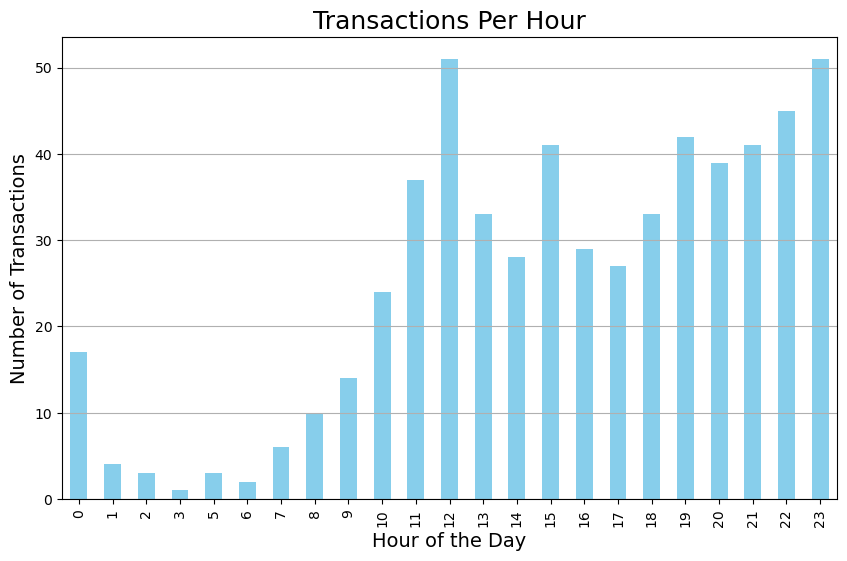

In [13]:
plt.figure(figsize=(10, 6))
Order_Details['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Transactions Per Hour', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.grid(axis='y')
plt.show()


In [14]:
busiest_day = Order_Details['Time'].dt.day_name().value_counts()
busiest_hour = Order_Details['Hour'].value_counts()
print(f"Busiest day:\n{busiest_day}\n")
print(f"Busiest hour:\n{busiest_hour}\n")


Busiest day:
Time
Saturday     229
Wednesday    152
Thursday     100
Monday        62
Sunday        38
Name: count, dtype: int64

Busiest hour:
Hour
23    51
12    51
22    45
19    42
21    41
15    41
20    39
11    37
13    33
18    33
16    29
14    28
17    27
10    24
0     17
9     14
8     10
7      6
1      4
2      3
5      3
6      2
3      1
Name: count, dtype: int64

